In [15]:
import numpy as np
import random
import pandas as pd
import matplotlib
from copy import deepcopy
from matplotlib import pyplot as plt
plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = [20, 25]
pd.set_option('display.max_rows', 5000)

### Preparacion de las simulaciones

Siguiendo el mismo procedimiento que el empleado para el miniproyecto 1, empezamos definiendo una funcion que devuelve un tiempo inter-llegadas aleatorio siguiendo un proceso de Poisson con cantidad promedio de clientes por hora lambda.

In [3]:
def tiempo_interllegadas(lbda):
    r = random.random()
    return -np.log(1.0-r)/lbda

A continuacion se define la funcion que permite realizar la simulacion. Se determinó que para representar una tienda de tamaño promedio se simmularían 4 cajas en total, dejando libres los parametros $\lambda_1$ y $\lambda_2$ que representan respectivamente el ritmo de llegadas promedio en clientes/minuto y el ritmo de atencion promedio en clientes/minuto que puede mantener cada una de las 4 cajas

In [4]:
def Simulacion_Supermercado(t, ta, Na, lbda_1, lbda_2, T_fin):
    
    #Listas con la informacion requerida
    lista_eventos = []
    lista_estados = []
    lista_t = []
    lista_ta = []
    lista_Na = []
    lista_cajas = []
    lista_tamanio_cola = []
    lista_clientes_atendidos = []
    
    
    C1 = [0, [[0, np.inf]], 0, 'C1']   #1er elemento es el No de clientes en la cola, 2do elemento es la cola de clientes, 3 elem. q clientes atendidos
    C2 = [0, [[0, np.inf]], 0, 'C2']   #cada cliente se representa como una lista, con un No de cliente, y un t de salida
    C3 = [0, [[0, np.inf]], 0, 'C3']
    C4 = [0, [[0, np.inf]], 0, 'C4']
    
    
    while(True):
        
        if (ta == min(ta, min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ), T_fin)):   #Registrar la llegada de un cliente
            
            
            if (C1[0] < min(C1[0], C2[0], C3[0], C4[0])):
                
                t = ta
                ta = t + tiempo_interllegadas(lbda_1)  #Establecer hora de la proxima llegada a la tienda
                Na = Na +1
                nuevo_cliente = [Na, np.inf]
                
                if (C1[1][0][1] == np.inf):
                    C1[1] = []
                    nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]  #definir el tiempo que tomara atender el nuevo cliente
                else:
                    nuevo_cliente = [Na, C1[1][-1][-1] + np.random.exponential(1/lbda_2)]
                
                C1[0] = C1[0]+1  #actualizar tamaño de la cola
                C1[1].append(deepcopy(nuevo_cliente))
                lista_eventos.append('Llegada')
                lista_estados.append(deepcopy(C1))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(Na)
                lista_cajas.append('C1')
                lista_tamanio_cola.append(C1[0])
                lista_clientes_atendidos.append(C1[2])
                
            elif (C2[0] < min(C1[0], C2[0], C3[0], C4[0])):
                
                t = ta
                ta = t + tiempo_interllegadas(lbda_1)
                Na = Na +1
                nuevo_cliente = [Na, np.inf]
                
                if (C2[1][0][1] == np.inf):
                    C2[1] = []
                    nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                else:
                    nuevo_cliente = [Na, C2[1][-1][-1] + np.random.exponential(1/lbda_2)]
                
                
                C2[0] = C2[0]+1
                C2[1].append(nuevo_cliente.copy())
                lista_eventos.append('Llegada')
                lista_estados.append(deepcopy(C2))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(Na)
                lista_cajas.append('C2')
                lista_tamanio_cola.append(C2[0])
                lista_clientes_atendidos.append(C2[2])
        
            elif (C3[0] < min(C1[0], C2[0], C3[0], C4[0])):
                
                t = ta
                ta = t + tiempo_interllegadas(lbda_1)
                Na = Na +1
                nuevo_cliente = [Na, np.inf]
                
                if (C3[1][0][1] == np.inf):
                    C3[1] = []
                    nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                else:
                    nuevo_cliente = [Na, C3[1][-1][-1] + np.random.exponential(1/lbda_2)]
                
                C3[0] = C3[0]+1
                C3[1].append(deepcopy(nuevo_cliente))
                lista_eventos.append('Llegada')
                lista_estados.append(deepcopy(C3))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(Na)
                lista_cajas.append('C3')
                lista_tamanio_cola.append(C3[0])
                lista_clientes_atendidos.append(C3[2])
                
            elif (C4[0] < min(C1[0], C2[0], C3[0], C4[0])):
                
                t = ta
                ta = t + tiempo_interllegadas(lbda_1)
                Na = Na +1
                nuevo_cliente = [Na, np.inf]
                
                if (C4[1][0][1] == np.inf):
                    C4[1] = []
                    nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                else:
                    nuevo_cliente = [Na, C4[1][-1][-1] + np.random.exponential(1/lbda_2)]
                
                C4[0] = C4[0]+1
                C4[1].append(deepcopy(nuevo_cliente))
                lista_eventos.append('Llegada')
                lista_estados.append(deepcopy(C4))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(Na)
                lista_cajas.append('C4')
                lista_tamanio_cola.append(C4[0])
                lista_clientes_atendidos.append(C4[2])
                
            else:
                sel = np.random.randint(1, high=5)
                
                if (sel == 1):
                    
                    t = ta
                    ta = t + tiempo_interllegadas(lbda_1)
                    Na = Na +1
                    nuevo_cliente = [Na, np.inf]
                    
                    if (C1[1][0][1] == np.inf):
                        C1[1] = []
                        nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                    else:
                        nuevo_cliente = [Na, C1[1][-1][-1] + np.random.exponential(1/lbda_2)]
                    
                    C1[0] = C1[0]+1
                    C1[1].append(deepcopy(nuevo_cliente))
                    lista_eventos.append('Llegada')
                    lista_estados.append(deepcopy(C1))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(Na)
                    lista_cajas.append('C1')
                    lista_tamanio_cola.append(C1[0])
                    lista_clientes_atendidos.append(C1[2])
                    
                elif (sel == 2):
                    
                    t = ta
                    ta = t + tiempo_interllegadas(lbda_1)
                    Na = Na +1
                    nuevo_cliente = [Na, np.inf]
                    
                    if (C2[1][0][1] == np.inf):
                        C2[1] = []
                        nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                    else:
                        nuevo_cliente = [Na, C2[1][-1][-1] + np.random.exponential(1/lbda_2)]
                    
                    C2[0] = C2[0]+1
                    C2[1].append(deepcopy(nuevo_cliente))
                    lista_eventos.append('Llegada')
                    lista_estados.append(deepcopy(C2))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(Na)
                    lista_cajas.append('C2')
                    lista_tamanio_cola.append(C2[0])
                    lista_clientes_atendidos.append(C2[2])
                    
                elif (sel == 3):
                    
                    t = ta
                    ta = t + tiempo_interllegadas(lbda_1)
                    Na = Na +1
                    nuevo_cliente = [Na, np.inf]
                    
                    if (C3[1][0][1] == np.inf):
                        C3[1] = []
                        nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                    else:
                        nuevo_cliente = [Na, C3[1][-1][-1] + np.random.exponential(1/lbda_2)]
                    
                    C3[0] = C3[0]+1
                    C3[1].append(deepcopy(nuevo_cliente))
                    lista_eventos.append('Llegada')
                    lista_estados.append(deepcopy(C3))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(Na)
                    lista_cajas.append('C3')
                    lista_tamanio_cola.append(C3[0])
                    lista_clientes_atendidos.append(C3[2])
                    
                else:
                    t = ta
                    ta = t + tiempo_interllegadas(lbda_1)
                    Na = Na +1
                    nuevo_cliente = [Na, np.inf]
                    
                    if (C4[1][0][1] == np.inf):
                        C4[1] = []
                        nuevo_cliente = [Na, t + np.random.exponential(1/lbda_2)]
                    else:
                        nuevo_cliente = [Na, C4[1][-1][-1] + np.random.exponential(1/lbda_2)]
                    
                    C4[0] = C4[0]+1
                    C4[1].append(deepcopy(nuevo_cliente))
                    lista_eventos.append('Llegada')
                    lista_estados.append(deepcopy(C4))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(Na)
                    lista_cajas.append('C4')
                    lista_tamanio_cola.append(C4[0])
                    lista_clientes_atendidos.append(C4[2])
        
        else:
            # ahora el caso en que se va un cliente
            
            if ( C1[1][0][1] == min(ta, min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ), T_fin)):
                
                t = C1[1][0][1]
                id_cliente = 0#
                if (C1[0] == 1):
                    id_cliente = C1[1][0][0]#
                    C1[0] = 0
                    C1[1] = [[0, np.inf]]
                    C1[2] = C1[2]+1  #incrementar No de clientes atendidos por la caja
                else:
                    C1[0] = C1[0]-1
                    id_cliente = C1[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                    C1[2] = C1[2]+1
                    
                lista_eventos.append('Salida')
                lista_estados.append(deepcopy(C1))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(id_cliente)
                lista_cajas.append('C1')
                lista_tamanio_cola.append(C1[0])
                lista_clientes_atendidos.append(C1[2])
                
            elif ( C2[1][0][1] == min(ta, min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ), T_fin)):
                
                t = C2[1][0][1]
                id_cliente = 0#
                if (C2[0] == 1):
                    id_cliente = C2[1][0][0]#
                    C2[0] = 0
                    C2[1] = [[0, np.inf]]
                    C2[2] = C2[2]+1  #incrementar No de clientes atendidos por la caja
                else:
                    C2[0] = C2[0]-1
                    id_cliente = C2[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 2
                    C2[2] = C2[2]+1
                    
                lista_eventos.append('Salida')
                lista_estados.append(deepcopy(C2))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(id_cliente)
                lista_cajas.append('C2')
                lista_tamanio_cola.append(C2[0])
                lista_clientes_atendidos.append(C2[2])
            
            elif ( C3[1][0][1] == min(ta, min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ), T_fin)):
                
                t = C3[1][0][1]
                id_cliente = 0
                if (C3[0] == 1):
                    id_cliente = C3[1][0][0]#
                    C3[0] = 0
                    C3[1] = [[0, np.inf]]
                    C3[2] = C3[2]+1  #incrementar No de clientes atendidos por la caja
                else:
                    C3[0] = C3[0]-1
                    id_cliente = C3[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                    C3[2] = C3[2]+1
                    
                lista_eventos.append('Salida')
                lista_estados.append(deepcopy(C3))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(id_cliente)
                lista_cajas.append('C3')
                lista_tamanio_cola.append(C3[0])
                lista_clientes_atendidos.append(C3[2])
                
            elif ( C4[1][0][1] == min(ta, min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ), T_fin)):
                
                t = C4[1][0][1]
                id_cliente = 0
                if (C4[0] == 1):
                    id_cliente = C4[1][0][0]#
                    C4[0] = 0
                    C4[1] = [[0, np.inf]]
                    C4[2] = C4[2]+1  #incrementar No de clientes atendidos por la caja
                else:
                    C4[0] = C4[0]-1
                    id_cliente = C4[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                    C4[2] = C4[2]+1
                    
                lista_eventos.append('Salida')
                lista_estados.append(deepcopy(C4))
                lista_t.append(t)
                lista_ta.append(ta)
                lista_Na.append(id_cliente)
                lista_cajas.append('C4')
                lista_tamanio_cola.append(C4[0])
                lista_clientes_atendidos.append(C4[2])
                
            elif (min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ) >= T_fin and 
                  max(C1[0], C2[0], C3[0], C4[0]) > 0):   # Ahora el caso en el que la tienda ya cerro pero aun hay gente en cola
                
                if ( C1[1][0][1] == min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] )):
                
                    t = C1[1][0][1]
                    id_cliente = 0
                    if (C1[0] == 1):
                        id_cliente = C1[1][0][0]#
                        C1[0] = 0
                        C1[1] = [[0, np.inf]]
                        C1[2] = C1[2]+1  #incrementar No de clientes atendidos por la caja
                    else:
                        C1[0] = C1[0]-1
                        id_cliente = C1[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                        C1[2] = C1[2]+1
                    
                    lista_eventos.append('Salida')
                    lista_estados.append(deepcopy(C1))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(id_cliente)
                    lista_cajas.append('C1')
                    lista_tamanio_cola.append(C1[0])
                    lista_clientes_atendidos.append(C1[2])
                
                elif ( C2[1][0][1] ==  min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] )):
                
                    t = C2[1][0][1]
                    id_cliente = 0
                    if (C2[0] == 1):
                        id_cliente = C2[1][0][0]#
                        C2[0] = 0
                        C2[1] = [[0, np.inf]]
                        C2[2] = C2[2]+1  #incrementar No de clientes atendidos por la caja
                    else:
                        C2[0] = C2[0]-1
                        id_cliente = C2[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 2
                        C2[2] = C2[2]+1
                    
                    lista_eventos.append('Salida')
                    lista_estados.append(deepcopy(C2))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(id_cliente)
                    lista_cajas.append('C2')
                    lista_tamanio_cola.append(C2[0])
                    lista_clientes_atendidos.append(C2[2])
            
                elif ( C3[1][0][1] == min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] )):
                
                    t = C3[1][0][1]
                    id_cliente = 0
                    if (C3[0] == 1):
                        id_cliente = C3[1][0][0]#
                        C3[0] = 0
                        C3[1] = [[0, np.inf]]
                        C3[2] = C3[2]+1  #incrementar No de clientes atendidos por la caja
                    else:
                        C3[0] = C3[0]-1
                        id_cliente = C3[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                        C3[2] = C3[2]+1
                    
                    lista_eventos.append('Salida')
                    lista_estados.append(deepcopy(C3))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(id_cliente)
                    lista_cajas.append('C3')
                    lista_tamanio_cola.append(C3[0])
                    lista_clientes_atendidos.append(C3[2])
                
                elif ( C4[1][0][1] == min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] )):
                
                    t = C4[1][0][1]
                    id_cliente = 0
                    if (C4[0] == 1):
                        id_cliente = C4[1][0][0]#
                        C4[0] = 0
                        C4[1] = [[0, np.inf]]
                        C4[2] = C4[2]+1  #incrementar No de clientes atendidos por la caja
                    else:
                        C4[0] = C4[0]-1
                        id_cliente = C4[1].pop(0)[0]   #eliminar el cliente de la cola de la caja 1
                        C4[2] = C4[2]+1
                    
                    lista_eventos.append('Salida')
                    lista_estados.append(deepcopy(C4))
                    lista_t.append(t)
                    lista_ta.append(ta)
                    lista_Na.append(id_cliente)
                    lista_cajas.append('C4')
                    lista_tamanio_cola.append(C4[0])
                    lista_clientes_atendidos.append(C4[2])
            
            elif (min(C1[1][0][1], C2[1][0][1], C3[1][0][1], C4[1][0][1] ) >= T_fin and 
                  max(C1[0], C2[0], C3[0], C4[0]) == 0):
                
                T_p = max(t-T_fin, 0)
                return lista_eventos, lista_estados, lista_t, lista_ta, lista_Na, lista_cajas, lista_tamanio_cola, lista_clientes_atendidos, T_p
                
                break
        
        
        
        
        
        

### Inicio simulaciones

La funcion esta lista para ejecutar simulaciones. A continuacion se realizan 4 simulaciones variando los parametros lbda_1 y lbda_2, que representan el ritmo de llegadas/minuto a la tienda y el ritmo de atencion en clientes/minuto respectivamente.

Los parametros para los siguientes 4 experimentos son los siguientes:

**Experimento 1**: 30 clientes por hora llegan en promedio a la tienda y un ritmo de atencion promedio de 10 minutos por cliente. Es decir: **lbda_1 = 1/2 clientes por minuto** y **lbda_2 = 1/10 clientes atendidos por minuto en cada caja**

**Experimento 2**: 30 clientes por hora llegan en promedio a la tienda y un ritmo de atencion promedio de 5 minutos por cliente. Es decir: **lbda_1 = 1/2 clientes por minuto** y **lbda_2 = 1/5 clientes atendidos por minuto en cada caja**

**Experimento 3**: 90 clientes por hora llegan en promedio a la tienda y un ritmo de atencion promedio de 5 minutos por cliente. Es decir: **lbda_1 = 3/2 clientes por minuto** y **lbda_2 = 1/5 clientes atendidos por minuto en cada caja**

**Experimento 4**: 120 clientes por hora llegan en promedio a la tienda y un ritmo de atencion promedio de 5 minutos por cliente. Es decir: **lbda_1 = 2 clientes por minuto** y **lbda_2 = 1/5 clientes atendidos por minuto en cada caja**


Notese que el objetivo de estos experimentos es determinar el putno a partir del cual se satura la tienda, es decir:

1. El tiempo de espera promedio supera los 25 minutos.
2. El numerod de clientes en cola promedio supera 5 personas



### Experimento 1

Primero definimos una cuantas funciones que nos serviran a generar la estadistica requerida de manera mas eficiente tras ejecuatar las 4 simulaciones.

In [6]:
#Funcion para calcular estadistica requerida por incisos 1 y 2:

def stats_1(Df, codigo):  #recibe como parametros el df con la simulacion y  el string que identifica la caja por ejemplo: 'C2'
    
    Caja = Df[Df['Id_caja'] == codigo]
    clientes = [cliente for cliente in Caja['Id_cliente']]
    clientes = list(dict.fromkeys(clientes))
    
    tiempos = []

    for cliente in clientes:
        datos = Caja[Caja['Id_cliente'] == cliente]
        datos = datos.reset_index(drop=True)
        tiempo_espera_cliente = datos.iloc[1,1] - datos.iloc[0,1]
        tiempos.append(tiempo_espera_cliente)

    promedio_espera_caja = np.average(tiempos)

    promedio_tamanio_cola = np.average([q for q in Caja['No_en_cola']])
    
    total_clientes_atendidos = max([No for No in Caja['Total_clientes_esta_caja']])
    
    return promedio_espera_caja, promedio_tamanio_cola, total_clientes_atendidos
    
    

In [7]:
#Funcion para calcular estadistica a nivel general (toda la tienda)

def stats_2(Df):
    
    cajas = ['C1', 'C2', 'C3', 'C4']
    
    tiempos_espera_prom = []
    tamanios_colas_prom = []
    clientes_atendidos_por_caja = []
    total_clientes_atendidos = max([Na for Na in Df['Id_cliente']])
    
    for codigo in cajas:
        tiempo, tamanio, clientes_atendidos = stats_1(Df, codigo)
        tiempos_espera_prom.append(tiempo)
        tamanios_colas_prom.append(tamanio)
        clientes_atendidos_por_caja.append(clientes_atendidos)

    tiempo_en_cola_tienda = np.average(tiempos_espera_prom)
    tamanio_cola_tienda = np.average(tamanios_colas_prom)
    
    #ahora el grado de utilizacion:
    
    grados_de_util = [q/total_clientes_atendidos for q in clientes_atendidos_por_caja]
    
    #Imprimir los resultados
    
    print('''
    
    ---------------------------------------------RESULTADOS SIMULACION--------------------------------------------
    
        -> RESULTADOS POR CAJA:
    
                TOTAL CLIENTES ATENDIDOS CAJA 1: {}
                TOTAL CLIENTES ATENDIDOS CAJA 2: {}
                TOTAL CLIENTES ATENDIDOS CAJA 3: {}
                TOTAL CLIENTES ATENDIDOS CAJA 4: {}
    
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 1: {}
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 2: {}
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 3: {}
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 4: {}
    
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 1: {}
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 2: {}
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 3: {}
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 4: {}
                
                GRADO DE UTILIZACION CAJA 1: {}
                GRADO DE UTILIZACION CAJA 2: {}
                GRADO DE UTILIZACION CAJA 3: {}
                GRADO DE UTILIZACION CAJA 4: {}
                
        -> RESULTADOS A NIVEL DE TIENDA:
        
                TOTAL CLIENTES ATENDIDOS: {}
                
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA: {}
                
                CANTIDAD PROMEDIO DE CLIENTES EN COLA: {}
                
                
    
    '''.format(clientes_atendidos_por_caja[0], clientes_atendidos_por_caja[1],
              clientes_atendidos_por_caja[2], clientes_atendidos_por_caja[3], 
              tiempos_espera_prom[0], tiempos_espera_prom[1], tiempos_espera_prom[2], 
              tiempos_espera_prom[3], tamanios_colas_prom[0], tamanios_colas_prom[1], 
              tamanios_colas_prom[2], tamanios_colas_prom[3], grados_de_util[0], grados_de_util[1], grados_de_util[2], 
              grados_de_util[3], total_clientes_atendidos, tiempo_en_cola_tienda, tamanio_cola_tienda))

In [8]:
def graficar_colas(Df):
    
    Caja_1 = Df[Df['Id_caja'] == 'C1']
    Caja_2 = Df[Df['Id_caja'] == 'C2']
    Caja_3 = Df[Df['Id_caja'] == 'C3']
    Caja_4 = Df[Df['Id_caja'] == 'C4']
    
    x_caja_1 = [t for t in Caja_1['t']]
    y_caja_1 = [q for q in Caja_1['No_en_cola']]
    
    x_caja_2 = [t for t in Caja_2['t']]
    y_caja_2 = [q for q in Caja_2['No_en_cola']]
    
    x_caja_3 = [t for t in Caja_3['t']]
    y_caja_3 = [q for q in Caja_3['No_en_cola']]
    
    x_caja_4 = [t for t in Caja_4['t']]
    y_caja_4 = [q for q in Caja_4['No_en_cola']]
    
    
    fig, axs = plt.subplots(4)
    fig.suptitle('Tamaño colas en cada caja', fontsize=16)
    axs[0].plot(x_caja_1, y_caja_1, '-ro')
    axs[0].set_title('CAJA 1')
    axs[1].plot(x_caja_2, y_caja_2, '-o')
    axs[1].set_title('CAJA 2')
    axs[2].plot(x_caja_3, y_caja_3, '-bo')
    axs[2].set_title('CAJA 3')
    axs[3].plot(x_caja_4, y_caja_4, '-go')
    axs[3].set_title('CAJA 4')
    
    for ax in axs.flat:
        ax.set(xlabel='tiempo en min', ylabel='Numero en cola')

##### Procediendo con la simulacion No. 1

$\lambda_1 = \frac{1}{2}$ y $\lambda_2 = \frac{1}{10}$

In [56]:
#EJECUTAMOS LA SIMULACION 1

#Inicializar las variables y el estado del sistema
lbda_1 = 0.5    #Ritmo de llegadas promedio en clientes/minuto
lbda_2 =  1/10   #Ritmo de atencion en clientes/minuto por caja
t = 0          # Momento de inicio de la simulacion
ta = tiempo_interllegadas(lbda_1)   #Llegada del primer cliente
Na = 0         #No de clientes atendidos, tmabien codio unico de cliente
T_fin = 60     #Momento de fin de la simulacion en minutos


#Llamando la funcion de la simulacion

lista_eventos, lista_estados, lista_t, lista_ta, lista_Na, lista_cajas, lista_tamanio_cola, lista_clientes_atendidos, T_p = Simulacion_Supermercado(t, ta, Na, lbda_1, lbda_2, T_fin)

In [57]:
#Creamos un dataframe para ordenar la informacion de la simulacion
Sim_1 = {'Evento': lista_eventos,
         't': lista_t,
         'Id_caja' : lista_cajas,
         'Id_cliente': lista_Na,
         'No_en_cola': lista_tamanio_cola,
         'Total_clientes_esta_caja': lista_clientes_atendidos,
         't_A': lista_ta,
         'SS' : lista_estados}

Df_Sim_1 = pd.DataFrame(Sim_1)

In [58]:
Df_Sim_1 #Vista en tabla de toda la primera simulacion

,Evento,t,Id_caja,Id_cliente,No_en_cola,Total_clientes_esta_caja,t_A,SS
0,Llegada,1.897007,C4,1,1,0,2.601199,"[1, [[1, 2.057390848365109]], 0, C4]"
1,Salida,2.057391,C4,1,0,1,2.601199,"[0, [[0, inf]], 1, C4]"
2,Llegada,2.601199,C2,2,1,0,5.986682,"[1, [[2, 3.123511634871221]], 0, C2]"
3,Salida,3.123512,C2,2,0,1,5.986682,"[0, [[0, inf]], 1, C2]"
4,Llegada,5.986682,C2,3,1,1,6.736249,"[1, [[3, 21.412836714516267]], 1, C2]"
5,Llegada,6.736249,C1,4,1,0,7.118887,"[1, [[4, 11.120118619732448]], 0, C1]"
6,Llegada,7.118887,C4,5,1,1,9.984670,"[1, [[5, 11.781556673092908]], 1, C4]"
7,Llegada,9.984670,C4,6,2,1,10.834319,"[2, [[5, 11.781556673092908], [6, 14.014561296..."
8,Llegada,10.834319,C2,7,2,1,13.816629,"[2, [[3, 21.412836714516267], [7, 29.237819039..."
9,Salida,11.120119,C1,4,0,1,13.816629,"[0, [[0, inf]], 1, C1]"


In [88]:
stats_2(Df_Sim_1)


    
    ---------------------------------------------RESULTADOS SIMULACION--------------------------------------------
    
        -> RESULTADOS POR CAJA:
    
                TOTAL CLIENTES ATENDIDOS CAJA 1: 8
                TOTAL CLIENTES ATENDIDOS CAJA 2: 12
                TOTAL CLIENTES ATENDIDOS CAJA 3: 7
                TOTAL CLIENTES ATENDIDOS CAJA 4: 16
    
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 1: 11.886651102373513
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 2: 14.11923654486587
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 3: 17.64979325816341
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 4: 63.19599462164776
    
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 1: 1.625
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 2: 2.5
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 3: 1.2142857142857142
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 4: 3.6875
                

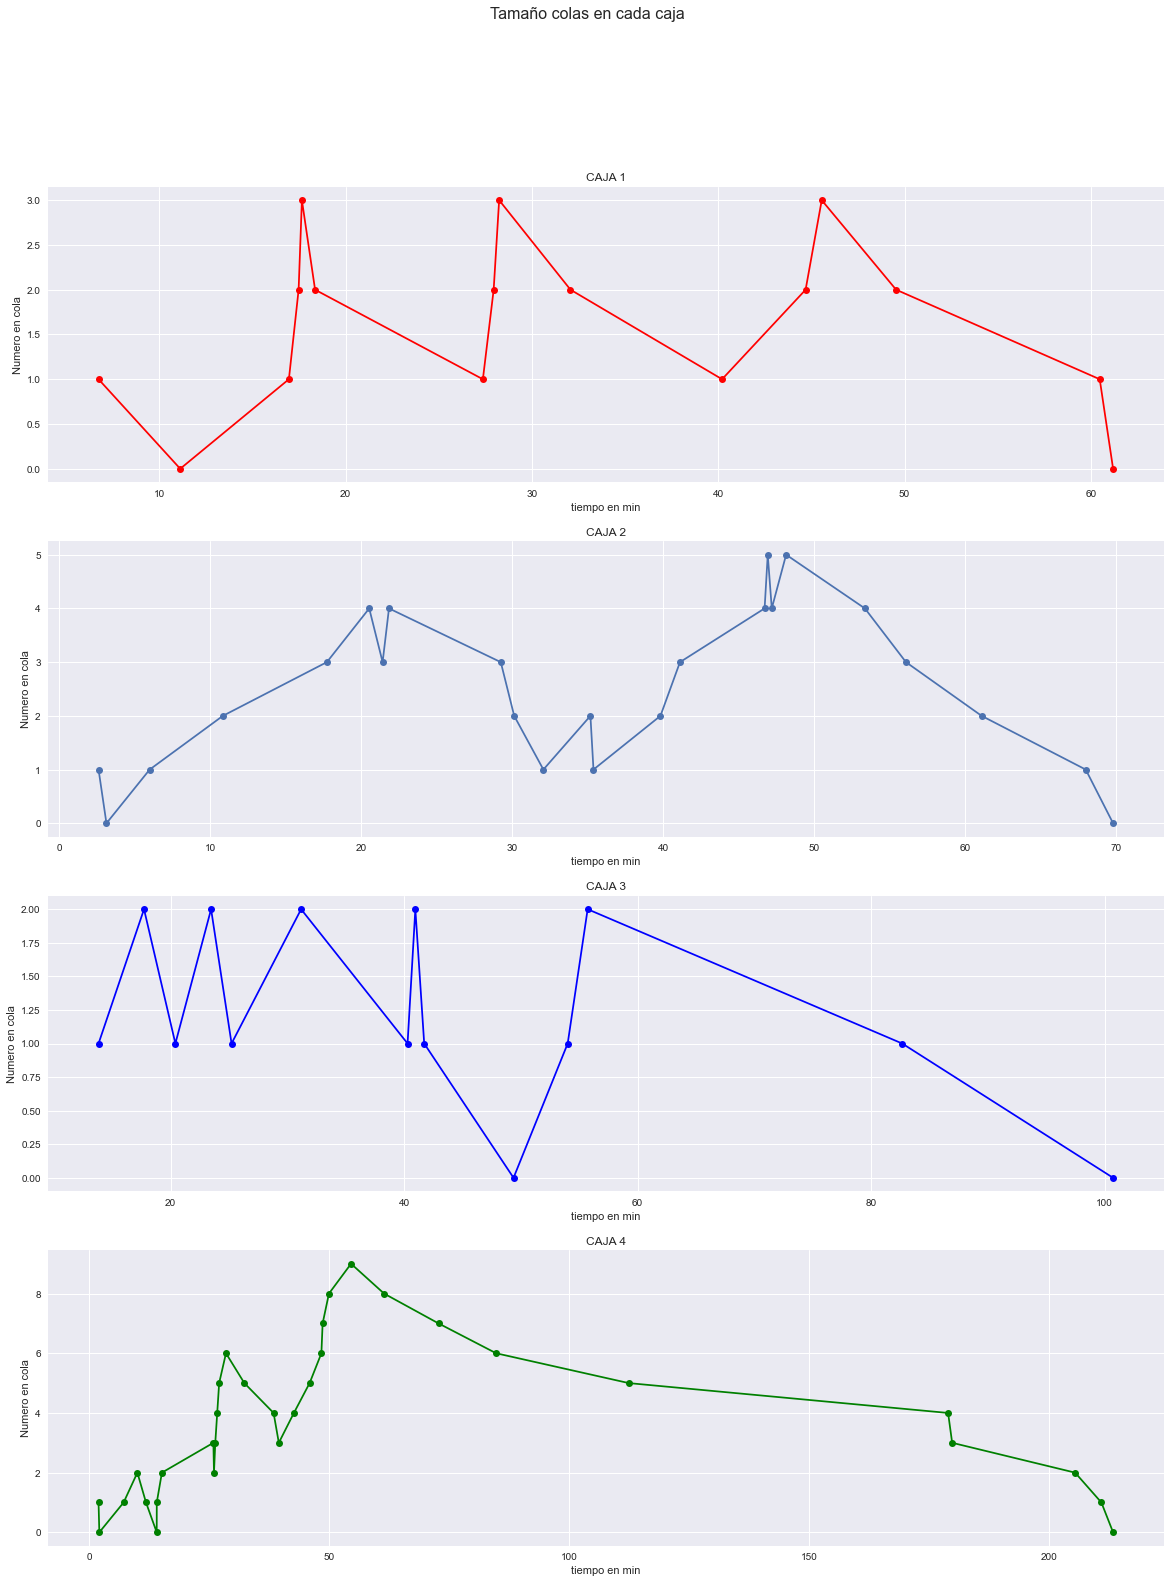

In [86]:
graficar_colas(Df_Sim_1)

##### Procediendo con la simulacion No. 2

$\lambda_1 = \frac{1}{2}$ y $\lambda_2 = \frac{1}{5}$

In [89]:
#EJECUTAMOS LA SIMULACION 2

#Inicializar las variables y el estado del sistema
lbda_1 = 0.5    #Ritmo de llegadas promedio en clientes/minuto
lbda_2 =  1/5   #Ritmo de atencion en clientes/minuto por caja
t = 0          # Momento de inicio de la simulacion
ta = tiempo_interllegadas(lbda_1)   #Llegada del primer cliente
Na = 0         #No de clientes atendidos, tmabien codio unico de cliente
T_fin = 60     #Momento de fin de la simulacion en minutos


#Llamando la funcion de la simulacion

lista_eventos, lista_estados, lista_t, lista_ta, lista_Na, lista_cajas, lista_tamanio_cola, lista_clientes_atendidos, T_p = Simulacion_Supermercado(t, ta, Na, lbda_1, lbda_2, T_fin)


In [90]:
#Creamos un dataframe para ordenar la informacion de la simulacion
Sim_2 = {'Evento': lista_eventos,
         't': lista_t,
         'Id_caja' : lista_cajas,
         'Id_cliente': lista_Na,
         'No_en_cola': lista_tamanio_cola,
         'Total_clientes_esta_caja': lista_clientes_atendidos,
         't_A': lista_ta,
         'SS' : lista_estados}

Df_Sim_2 = pd.DataFrame(Sim_2)

In [91]:
Df_Sim_2 #Vista en tabla de toda la segunda simulacion

,Evento,t,Id_caja,Id_cliente,No_en_cola,Total_clientes_esta_caja,t_A,SS
0,Llegada,1.475516,C1,1,1,0,2.328671,"[1, [[1, 1.8629512960229895]], 0, C1]"
1,Salida,1.862951,C1,1,0,1,2.328671,"[0, [[0, inf]], 1, C1]"
2,Llegada,2.328671,C4,2,1,0,2.434076,"[1, [[2, 3.729995621282518]], 0, C4]"
3,Llegada,2.434076,C2,3,1,0,13.078504,"[1, [[3, 4.40782848770016]], 0, C2]"
4,Salida,3.729996,C4,2,0,1,13.078504,"[0, [[0, inf]], 1, C4]"
5,Salida,4.407828,C2,3,0,1,13.078504,"[0, [[0, inf]], 1, C2]"
6,Llegada,13.078504,C3,4,1,0,13.445617,"[1, [[4, 15.868216715320944]], 0, C3]"
7,Llegada,13.445617,C4,5,1,1,21.960333,"[1, [[5, 17.22994707764304]], 1, C4]"
8,Salida,15.868217,C3,4,0,1,21.960333,"[0, [[0, inf]], 1, C3]"
9,Salida,17.229947,C4,5,0,2,21.960333,"[0, [[0, inf]], 2, C4]"


In [92]:
stats_2(Df_Sim_2) #Obtener estadistica sim 2


    
    ---------------------------------------------RESULTADOS SIMULACION--------------------------------------------
    
        -> RESULTADOS POR CAJA:
    
                TOTAL CLIENTES ATENDIDOS CAJA 1: 5
                TOTAL CLIENTES ATENDIDOS CAJA 2: 10
                TOTAL CLIENTES ATENDIDOS CAJA 3: 6
                TOTAL CLIENTES ATENDIDOS CAJA 4: 12
    
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 1: 9.064136459940249
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 2: 11.988887322854415
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 3: 4.779909149493528
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 4: 7.80437286540905
    
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 1: 0.9
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 2: 2.3
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 3: 0.8333333333333334
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 4: 1.9166666666666667
       

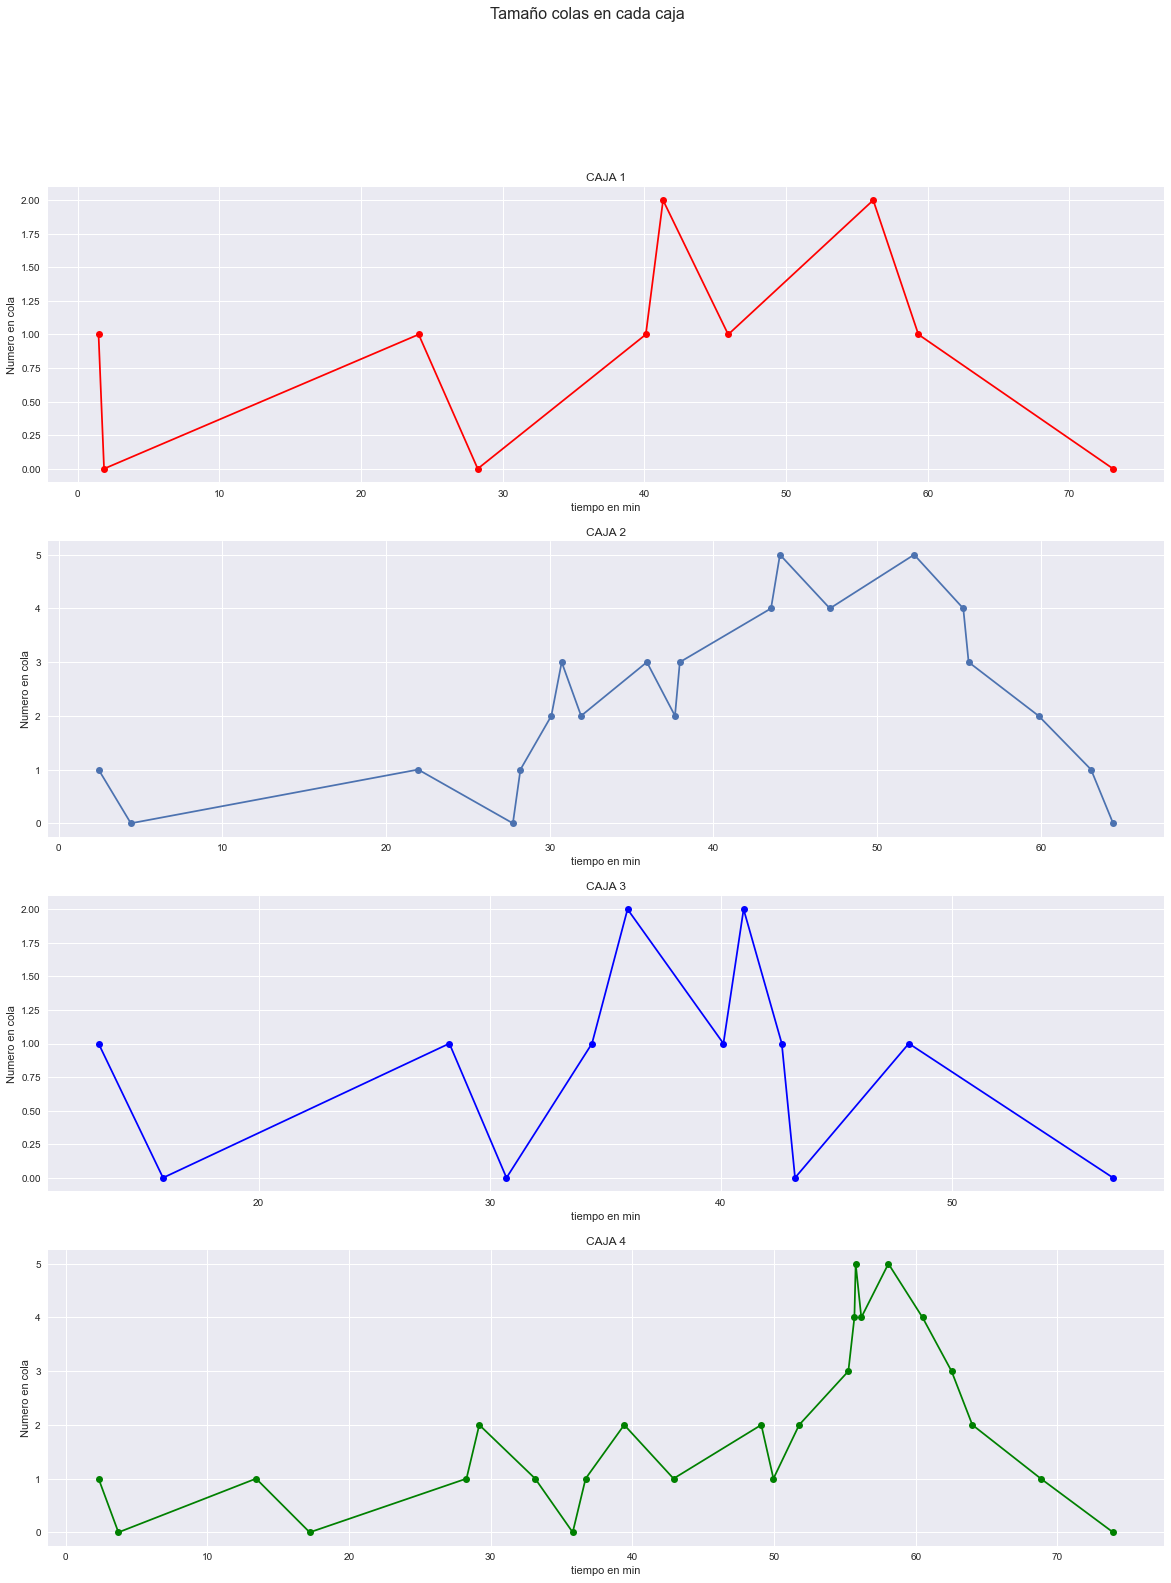

In [93]:
graficar_colas(Df_Sim_2)  #Obtener graficas colas sim 2

##### Procediendo con la simulacion No. 3

$\lambda_1 = \frac{3}{2}$ y $\lambda_2 = \frac{1}{5}$

In [103]:
#EJECUTAMOS LA SIMULACION 3

#Inicializar las variables y el estado del sistema
lbda_1 = 1.5    #Ritmo de llegadas promedio en clientes/minuto
lbda_2 =  1/5   #Ritmo de atencion en clientes/minuto por caja
t = 0          # Momento de inicio de la simulacion
ta = tiempo_interllegadas(lbda_1)   #Llegada del primer cliente
Na = 0         #No de clientes atendidos, tmabien codio unico de cliente
T_fin = 60     #Momento de fin de la simulacion en minutos


#Llamando la funcion de la simulacion

lista_eventos, lista_estados, lista_t, lista_ta, lista_Na, lista_cajas, lista_tamanio_cola, lista_clientes_atendidos, T_p = Simulacion_Supermercado(t, ta, Na, lbda_1, lbda_2, T_fin)


In [104]:
#Creamos un dataframe para ordenar la informacion de la simulacion
Sim_3 = {'Evento': lista_eventos,
         't': lista_t,
         'Id_caja' : lista_cajas,
         'Id_cliente': lista_Na,
         'No_en_cola': lista_tamanio_cola,
         'Total_clientes_esta_caja': lista_clientes_atendidos,
         't_A': lista_ta,
         'SS' : lista_estados}

Df_Sim_3 = pd.DataFrame(Sim_3)

In [105]:
Df_Sim_3 #Vista en tabla de toda la tercera simulacion

,Evento,t,Id_caja,Id_cliente,No_en_cola,Total_clientes_esta_caja,t_A,SS
0,Llegada,0.676541,C2,1,1,0,1.401918,"[1, [[1, 0.7267621347516652]], 0, C2]"
1,Salida,0.726762,C2,1,0,1,1.401918,"[0, [[0, inf]], 1, C2]"
2,Llegada,1.401918,C1,2,1,0,1.862620,"[1, [[2, 4.326839214143412]], 0, C1]"
3,Llegada,1.862620,C3,3,1,0,1.876156,"[1, [[3, 7.90194725520706]], 0, C3]"
4,Llegada,1.876156,C2,4,1,1,2.280235,"[1, [[4, 15.45711444637854]], 1, C2]"
5,Llegada,2.280235,C1,5,2,0,2.688034,"[2, [[2, 4.326839214143412], [5, 11.5818697721..."
6,Llegada,2.688034,C1,6,3,0,4.522939,"[3, [[2, 4.326839214143412], [5, 11.5818697721..."
7,Salida,4.326839,C1,2,2,1,4.522939,"[2, [[5, 11.581869772160658], [6, 15.184493908..."
8,Llegada,4.522939,C2,7,2,1,4.997526,"[2, [[4, 15.45711444637854], [7, 32.0042258180..."
9,Llegada,4.997526,C2,8,3,1,6.119246,"[3, [[4, 15.45711444637854], [7, 32.0042258180..."


In [106]:
stats_2(Df_Sim_3) #Obtener estadistica sim 3


    
    ---------------------------------------------RESULTADOS SIMULACION--------------------------------------------
    
        -> RESULTADOS POR CAJA:
    
                TOTAL CLIENTES ATENDIDOS CAJA 1: 21
                TOTAL CLIENTES ATENDIDOS CAJA 2: 32
                TOTAL CLIENTES ATENDIDOS CAJA 3: 24
                TOTAL CLIENTES ATENDIDOS CAJA 4: 28
    
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 1: 31.318850554563966
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 2: 54.58064855304883
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 3: 51.06214910641567
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 4: 33.661619103306485
    
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 1: 5.214285714285714
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 2: 13.09375
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 3: 8.666666666666666
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 4: 7.60

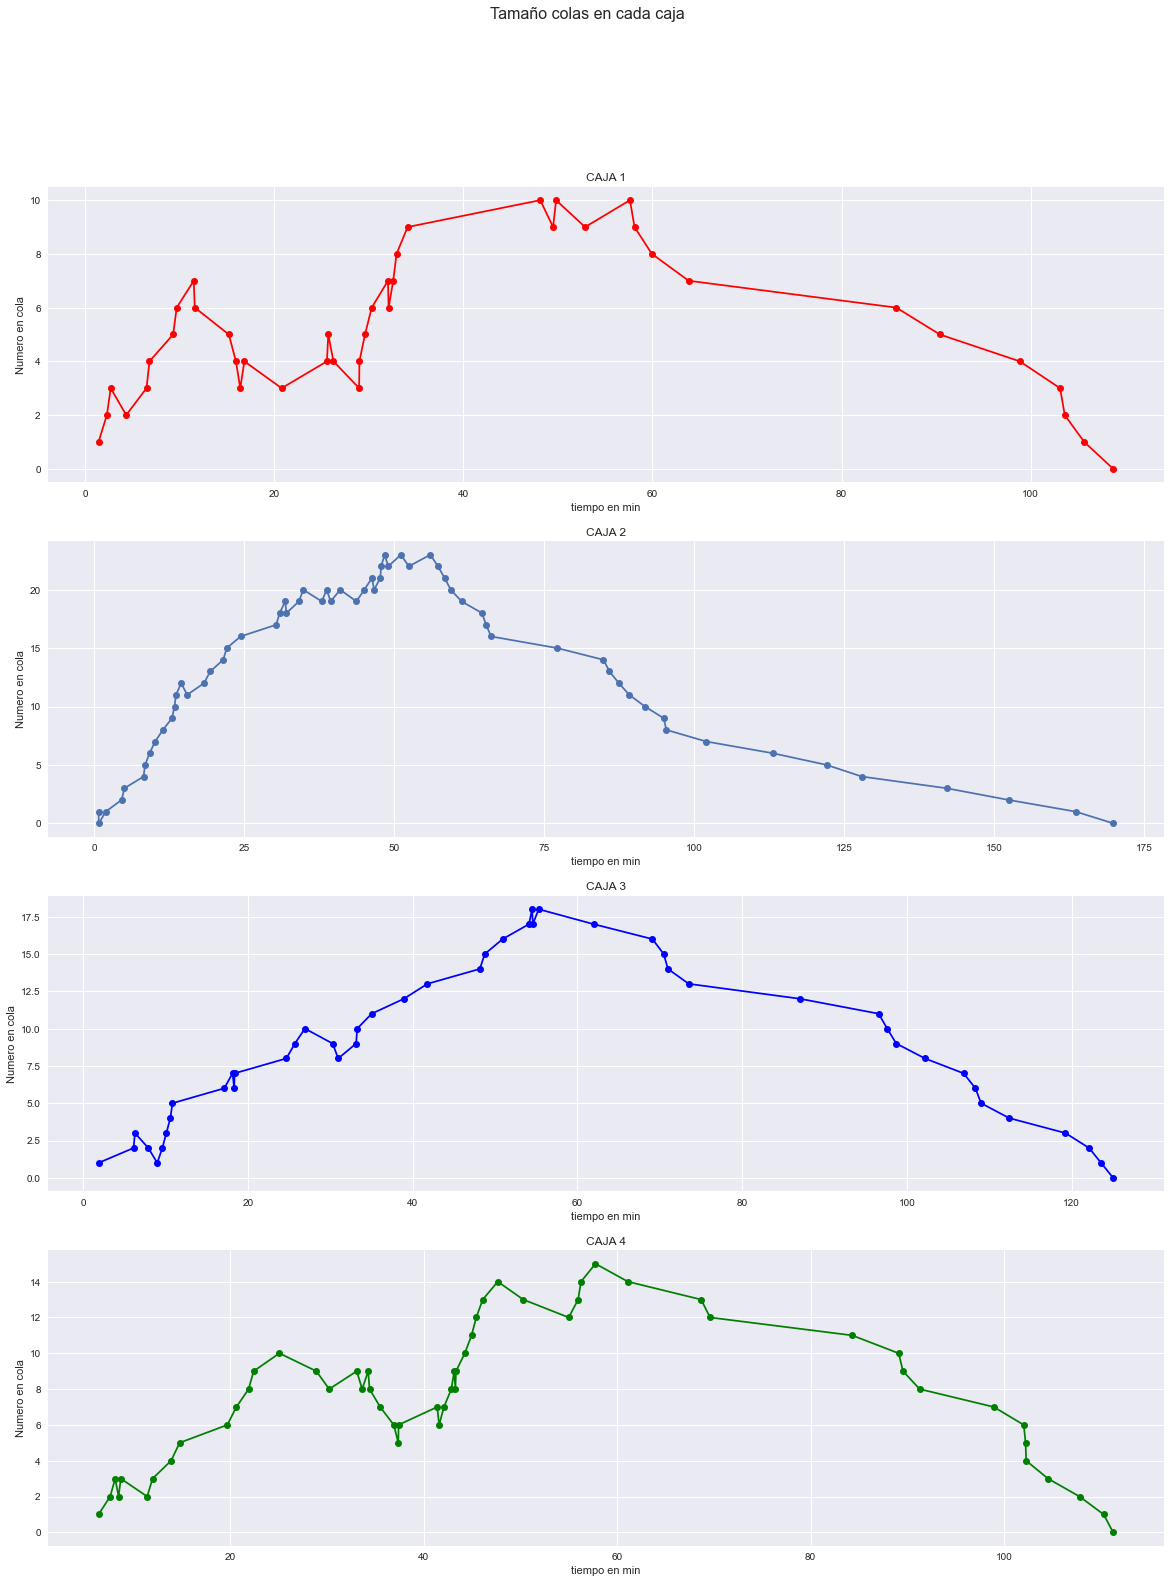

In [107]:
graficar_colas(Df_Sim_3)  #Obtener graficas colas sim 3

##### Procediendo con la simulacion No. 4

$\lambda_1 = 2$ y $\lambda_2 = \frac{1}{5}$

In [9]:
#EJECUTAMOS LA SIMULACION 4

#Inicializar las variables y el estado del sistema
lbda_1 = 2    #Ritmo de llegadas promedio en clientes/minuto
lbda_2 =  1/5   #Ritmo de atencion en clientes/minuto por caja
t = 0          # Momento de inicio de la simulacion
ta = tiempo_interllegadas(lbda_1)   #Llegada del primer cliente
Na = 0         #No de clientes atendidos, tmabien codio unico de cliente
T_fin = 60     #Momento de fin de la simulacion en minutos


#Llamando la funcion de la simulacion

lista_eventos, lista_estados, lista_t, lista_ta, lista_Na, lista_cajas, lista_tamanio_cola, lista_clientes_atendidos, T_p = Simulacion_Supermercado(t, ta, Na, lbda_1, lbda_2, T_fin)


In [11]:
#Creamos un dataframe para ordenar la informacion de la simulacion
Sim_4 = {'Evento': lista_eventos,
         't': lista_t,
         'Id_caja' : lista_cajas,
         'Id_cliente': lista_Na,
         'No_en_cola': lista_tamanio_cola,
         'Total_clientes_esta_caja': lista_clientes_atendidos,
         't_A': lista_ta,
         'SS' : lista_estados}

Df_Sim_4 = pd.DataFrame(Sim_4)

In [12]:
Df_Sim_4 #Vista en tabla de toda la cuarta simulacion

,Evento,t,Id_caja,Id_cliente,No_en_cola,Total_clientes_esta_caja,t_A,SS
0,Llegada,0.351420,C3,1,1,0,0.417305,"[1, [[1, 3.098622752499448]], 0, C3]"
1,Llegada,0.417305,C4,2,1,0,0.555112,"[1, [[2, 6.301744595342771]], 0, C4]"
2,Llegada,0.555112,C1,3,1,0,0.626550,"[1, [[3, 5.497168486383063]], 0, C1]"
3,Llegada,0.626550,C3,4,2,0,0.956571,"[2, [[1, 3.098622752499448], [4, 3.51086058144..."
4,Llegada,0.956571,C4,5,2,0,1.217281,"[2, [[2, 6.301744595342771], [5, 7.87827211898..."
5,Llegada,1.217281,C2,6,1,0,1.311371,"[1, [[6, 2.1701233203309913]], 0, C2]"
6,Llegada,1.311371,C1,7,2,0,1.421102,"[2, [[3, 5.497168486383063], [7, 14.7125264380..."
7,Llegada,1.421102,C3,8,3,0,2.457930,"[3, [[1, 3.098622752499448], [4, 3.51086058144..."
8,Salida,2.170123,C2,6,0,1,2.457930,"[0, [[0, inf]], 1, C2]"
9,Llegada,2.457930,C2,9,1,1,2.605812,"[1, [[9, 2.5165531393356515]], 1, C2]"


In [13]:
stats_2(Df_Sim_4) #Obtener estadistica sim 4


    
    ---------------------------------------------RESULTADOS SIMULACION--------------------------------------------
    
        -> RESULTADOS POR CAJA:
    
                TOTAL CLIENTES ATENDIDOS CAJA 1: 28
                TOTAL CLIENTES ATENDIDOS CAJA 2: 28
                TOTAL CLIENTES ATENDIDOS CAJA 3: 34
                TOTAL CLIENTES ATENDIDOS CAJA 4: 35
    
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 1: 39.9306960970754
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 2: 53.25404234378012
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 3: 54.32728924221764
                TIEMPO PROMEDIO DE UN CLIENTE EN COLA CAJA 4: 72.93306422088821
    
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 1: 8.392857142857142
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 2: 8.178571428571429
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 3: 11.558823529411764
                CANTIDAD PROMEDIO DE CLIENTES EN COLA CAJA 

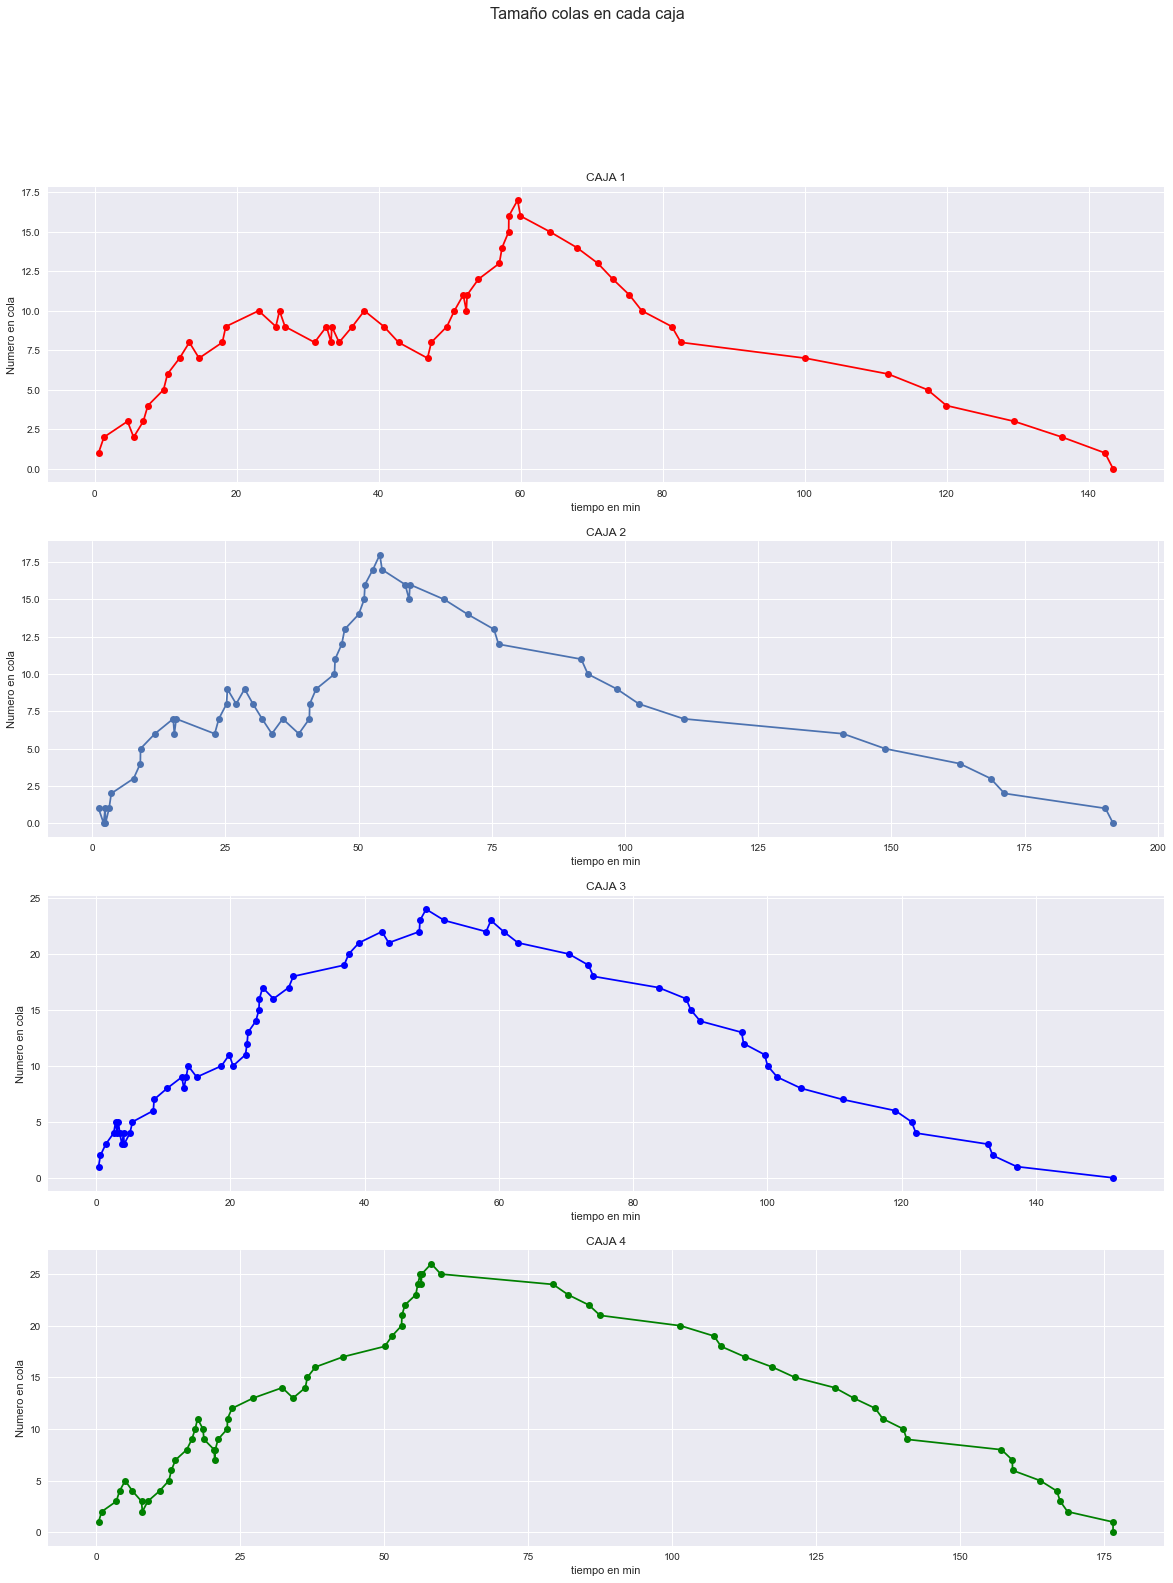

In [16]:
graficar_colas(Df_Sim_4)  #Obtener graficas colas sim 4